In [403]:
import numpy as np
import pandas as pd
import scipy.interpolate as itp
import matplotlib.pyplot as plot

csv_array=pd.read_csv('ug_detect.csv',index_col='采集时间点')
csv_array[csv_array>888.88]=np.nan
csv_array_save=csv_array

In [404]:
print(type(csv_array))
print(csv_array)

<class 'pandas.core.frame.DataFrame'>
       温度（?C）  相对湿度  瓦斯(m?/min)  一氧化碳(m?/min)
采集时间点                                        
1       30.22  69.0        2.90          3.60
2       37.68   NaN        2.86          3.64
3       29.32  66.0         NaN          1.66
4       37.44  68.0        1.18          6.49
5       29.46  75.0        3.81          4.78
6       30.12  77.0        1.93          4.20
7       26.30  83.0        2.07          3.67
8         NaN  66.0        1.46           NaN
9       34.38  62.0        3.36          4.39
10      30.79  75.0        2.40          5.79
11      25.17  69.0        3.34          6.28
12      20.50  80.0        2.95          6.22
13      37.21   NaN         NaN          4.75
14      31.88  94.0        2.41          1.49
15      39.94  77.0        1.98          1.08
16      33.65  67.0        2.03           NaN
17      27.21  79.0        1.41          2.50
18      27.57   NaN        3.39          1.70
19      31.59  94.0        3.27          5

In [312]:
#avg
csv_array=csv_array_save
for index in range(len(csv_array.values)):
    for item_index in range(len(csv_array.values[index])):
        if np.isnan(csv_array.values[index,item_index]):
            csv_array.iat[index,item_index]=(csv_array.values[index-1,item_index]+csv_array.values[index+1,item_index])/2
avg_array=csv_array

In [408]:
#lagrange
csv_array=csv_array_save
for index in range(len(csv_array.values[0])):
    nan_index=np.where(np.isnan(csv_array_save.values[:,index]))[0]
    nan_index=[0]+list(nan_index)+[len(csv_array.values)-1]
    print(nan_index)
    for index_index in range(1,len(nan_index)-1):
        if np.isnan(csv_array.values[nan_index[index_index],index]):
            x_list=np.delete(csv_array.index,[nan_index[index_index]])[nan_index[index_index-1]+1:nan_index[index_index+1]-1]
            y_list=np.delete(csv_array.values,[nan_index[index_index]],axis=0)[nan_index[index_index-1]+1:nan_index[index_index+1]-1,index]
            if nan_index[index_index]-nan_index[index_index-1]>2:
                x_list=x_list[nan_index[index_index]-nan_index[index_index-1]-2:]
                y_list=y_list[nan_index[index_index]-nan_index[index_index-1]-2:]
            if nan_index[index_index+1]-nan_index[index_index]>2:
                x_list=x_list[:0-nan_index[index_index+1]+nan_index[index_index]+2]
                y_list=y_list[:0-nan_index[index_index+1]+nan_index[index_index]+2]
            lagrange_ploy=itp.lagrange(x_list,y_list)
            print(lagrange_ploy(nan_index[index_index]))
            csv_array.iat[nan_index[index_index],index]=lagrange_ploy(nan_index[index_index])
lag_array=csv_array

[0, 7, 19, 25, 35, 43]
26.300000000000004
31.590000000000003
34.71000000000005
38.700000000000045
[0, 1, 12, 17, 25, 31, 43]
66.0
80.0
79.0
72.0
67.0
[0, 2, 12, 19, 35, 43]
2.8600000000000003
2.950000000000001
3.2699999999999996
3.6099999999999985
[0, 7, 15, 25, 27, 32, 43]
3.6700000000000013
1.0799999999999983
2.490000000000002
3.8500000000000014
3.769999999999996


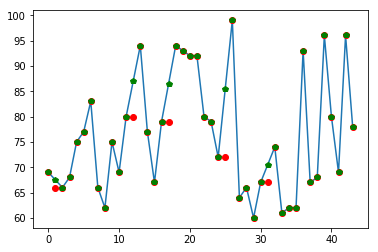

67.0


In [409]:
plot.plot(avg_array.values[:,1])
plot.plot(lag_array.values[:,1],'ro')
plot.plot(avg_array.values[:,1],'gp')
plot.show()
print(lag_array.values[31,1])